In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# Load your data
data = pd.read_csv('cleaned_data.csv')
data.fillna("missing", inplace=True)

# Define your preprocessing and model pipeline
# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer(stop_words=all_stopwords, preprocessor=clean_text)),
#     ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
# ])

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])




In [2]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [3]:

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9222427484945179
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     35642
           1       0.95      0.92      0.93     35093
           2       0.87      0.88      0.88     12627

    accuracy                           0.92     83362
   macro avg       0.91      0.91      0.91     83362
weighted avg       0.92      0.92      0.92     83362



Accuracy: 0.9222427484945179
Precision: 0.9227532755916569
Recall: 0.9222427484945179
F1 Score: 0.9222999652620487



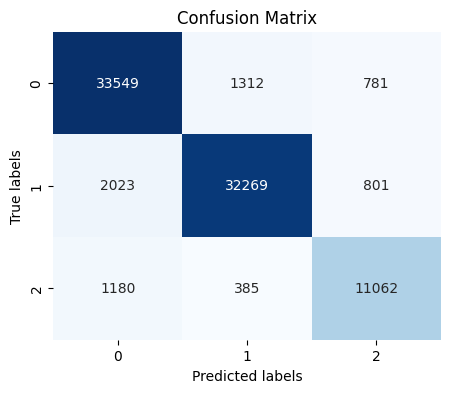

In [4]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix,make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' based on your needs
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' based on your needs
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' based on your needs
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print()
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [5]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

custom_stopwords = [
    "i","im","like", "feel", "feeling", "my", "the", "to",
                     "for","know","littl","think","time","thing","would","go",
                     "realli","feel","am","so","get", "one", "to", "and", "at", "can",
                     "day","way", "make", "me", "want", "could" , "would", "tri", "u"                      
                     ]


all_stopwords=stopwords.words('english') + custom_stopwords

print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
testData = pd.read_csv('test_sample.csv')
new_mapping={0:'Negative',1:'Positive',2:'Neutral'}

In [7]:
import re
#  function to clean text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove all non-word characters
    text = re.sub(r'\s+', ' ', text)  # Replace all runs of whitespaces with a single space
    # Optionally, remove stopwords and stem
    words = text.split()
    words = [word for word in words if word not in all_stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

In [8]:
# Clean the new data using the same cleaning function used during training
# If you applied text cleaning in the pipeline or before training, ensure to clean new_data similarly
cleaned_new_data = [clean_text(text) for text in testData['text']]  # Use the same clean_text function defined earlier

# Use the model to make predictions on the new, cleaned data
predictions = pipeline.predict(cleaned_new_data)

# Calculate and print the accuracy
accuracy = accuracy_score(testData['label'], predictions)
f1 = f1_score(testData['label'], predictions, average="weighted")
precision = precision_score(testData['label'], predictions, average="weighted")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print()

# To see the predictions alongside the actual labels
# for pred, actual in zip(predictions, actual_labels):
#     print(f'Predicted: {mapping[pred]}, Actual: {mapping[actual]}')

Accuracy: 0.9120439780109945
Precision: 0.9153372832010974
F1 Score: 0.9121174585122893



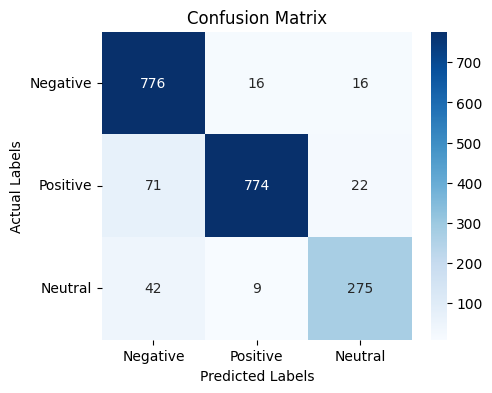

In [9]:

import numpy as np
# Assuming 'predictions' and 'actual_labels' are your lists of predicted and actual labels
cm = confusion_matrix(testData['label'], predictions)

# Generate a mapping of emotions for the axis ticks
emotion_labels = [new_mapping[label] for label in sorted(new_mapping)]
emotion_ticks = np.arange(len(emotion_labels))

# Plotting
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.xticks(emotion_ticks + 0.5, emotion_labels)
plt.yticks(emotion_ticks + 0.5, emotion_labels, rotation=0)
plt.show()